So somehow I forgot to include how to compute expectation values in Qiskit Aer, so that's what will be shown here. We will make a 2 qubit circuit and determine the expectation values for certain gates. 

In [46]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import time
from qiskit.circuit import Parameter

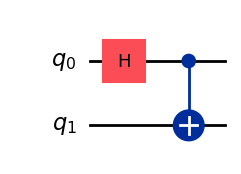

In [47]:
qubits = 2

qc = QuantumCircuit(qubits)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl")

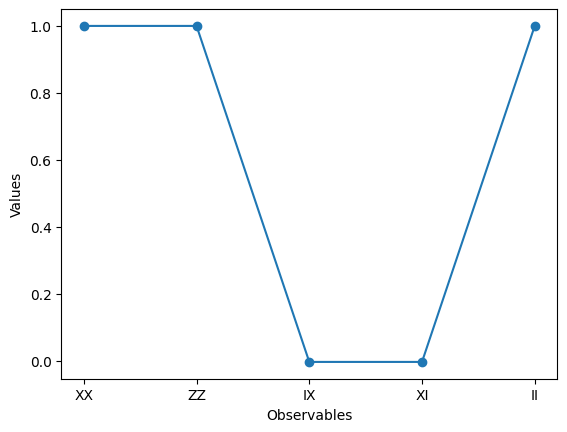

In [48]:
# Next we define the observables which we will use

observables = [
    SparsePauliOp("XX"),
    SparsePauliOp("ZZ"),
    SparsePauliOp("IX"),
    SparsePauliOp("XI"),
    SparsePauliOp("II")
]

estimator = Estimator()

results = estimator.run(circuits= [qc] * len(observables), observables= observables).result()

values = results.values

from matplotlib import pyplot as plt
 
# plotting graph
plt.plot(["XX","ZZ","IX", "XI", "II"], values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()


Process of using the Estimator Primitive:

First setup your quantum circuit as usual. Then define your observables using the `SparsePauliOp()` and using the gates `"X"`,`"Y"`,`"Z"` and `"I"`. Note that the length of these observables MUST match the total number of qubits in the circuit (so a 3 qubit circuit needs something like `"ZZZ"` no `"ZZ"` or `"ZZZZ"`). If one want to create a custom observable using a linear combination, use `SparsePauliOp.from_list([("XX",a),("ZZ",b)...])` where it will take a linear combination of each of the observables with the second number in the coordinate as the coefficient. So it basically makes an observable using form `("Gate",coeff)` and taking the sum of all. 

Afterward, load up your `Estimator()` and run it and ensure that you give the estimator a new quantum circuit for each observable, so do something like `estimator.run(circuits= [qc] * len(observables), observables= observables)`. Then take the result of that job which will contain values in the `.values` attribute. Then you can plot them like something shown above. Or you could simply print each which is a simple task. 